# $ Lable Encoding $  
it is a simple encoding technique that converts the categories into numbers. It is used when the categories are ordinal in nature.

In [1]:
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import pandas as pd

In [2]:
encoder = LabelEncoder()

In [3]:
df=sns.load_dataset('titanic')
# df.head()
df['class'].value_counts()

class
Third     491
First     216
Second    184
Name: count, dtype: int64

In [4]:
encoded_data=encoder.fit_transform(df['who'])

In [5]:
df1=pd.DataFrame(encoded_data,columns=['who'])
df1.head()

,who
0,1
1,2
2,2
3,2
4,1


# $Ordinal Encoding$ 
it is a type of encoding that is used to encode ordinal categorical variables. Ordinal categorical variables are categorical variables that have a clear ordering. For example, a variable like education level (with values like 'High School', 'Bachelors', 'Masters', 'PhD') is an ordinal variable because there is a clear ordering of the categories.

In [6]:
from sklearn.preprocessing import  OrdinalEncoder

O_encoder = OrdinalEncoder(categories=[['First','Second','Third']])

O_data=O_encoder.fit_transform(df[["class"]])
O_df=pd.DataFrame(O_data,columns=['class'])
O_df

,class
0,2.0
1,0.0
2,2.0
3,0.0
4,2.0
...,...
886,1.0
887,0.0
888,2.0
889,0.0


# $ Target Encoding$ 
Target encoding is a technique used to encode categorical variables. It is the process of replacing a categorical value with the mean of the target variable. It is also known as mean encoding or likelihood encoding.

In [7]:
df=sns.load_dataset("tips")
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [8]:
df.groupby('sex')['total_bill'].mean()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5708\3379495421.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('sex')['total_bill'].mean()


sex
Male      20.744076
Female    18.056897
Name: total_bill, dtype: float64

In [9]:
df[df["sex"]== "Female"]["total_bill"].median()

16.4

<Axes: xlabel='total_bill', ylabel='Count'>

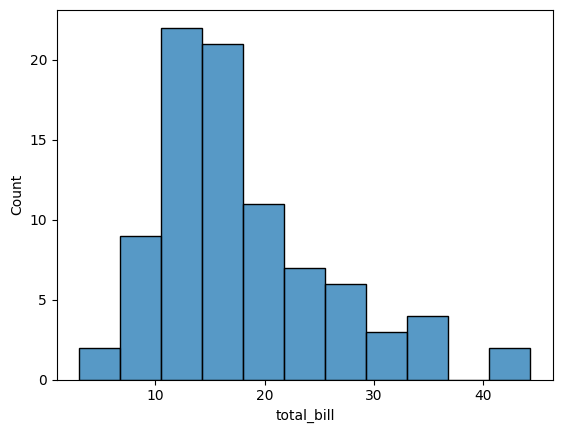

In [10]:
sns.histplot(df[df["sex"]== "Female"]["total_bill"])

<Axes: xlabel='total_bill', ylabel='Count'>

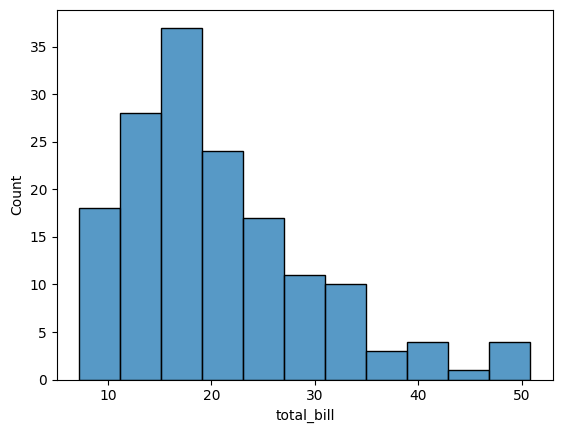

In [11]:
sns.histplot(df[df["sex"]== "Male"]["total_bill"])

In [12]:
mean=df.groupby('sex')["total_bill"].mean().to_dict()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5708\62707811.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean=df.groupby('sex')["total_bill"].mean().to_dict()


In [13]:
mean

{'Male': 20.74407643312102, 'Female': 18.05689655172414}

In [14]:
df["expenditure"]=df['sex'].map(mean)

In [15]:
df

,total_bill,tip,sex,smoker,day,time,size,expenditure
0,16.99,1.01,Female,No,Sun,Dinner,2,18.056897
1,10.34,1.66,Male,No,Sun,Dinner,3,20.744076
2,21.01,3.50,Male,No,Sun,Dinner,3,20.744076
3,23.68,3.31,Male,No,Sun,Dinner,2,20.744076
4,24.59,3.61,Female,No,Sun,Dinner,4,18.056897
...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,20.744076
240,27.18,2.00,Female,Yes,Sat,Dinner,2,18.056897
241,22.67,2.00,Male,Yes,Sat,Dinner,2,20.744076
242,17.82,1.75,Male,No,Sat,Dinner,2,20.744076


# Covarience  and Correlation coeficient

In [72]:
df=sns.load_dataset('healthexp')
df.cov(numeric_only=True)


,Year,Spending_USD,Life_Expectancy
Year,201.098848,2.571883e+04,41.915454
Spending_USD,25718.827373,4.817761e+06,4166.800912
Life_Expectancy,41.915454,4.166801e+03,10.733902


In [78]:
df.corr(numeric_only=True)

,Year,Spending_USD,Life_Expectancy
Year,1.000000,0.826273,0.902175
Spending_USD,0.826273,1.000000,0.579430
Life_Expectancy,0.902175,0.579430,1.000000


In [74]:
df.head()

,Year,Country,Spending_USD,Life_Expectancy
0,1970,Germany,252.311,70.6
1,1970,France,192.143,72.2
2,1970,Great Britain,123.993,71.9
3,1970,Japan,150.437,72.0
4,1970,USA,326.961,70.9


In [75]:
import numpy as np
np.cov(df['Spending_USD'],df['Year'])

array([[4.81776066e+06, 2.57188274e+04],
       [2.57188274e+04, 2.01098848e+02]])

In [83]:
df.corr(method='pearson',numeric_only=True) #pearson correlation  -1 to 1

,Year,Spending_USD,Life_Expectancy
Year,1.000000,0.826273,0.902175
Spending_USD,0.826273,1.000000,0.579430
Life_Expectancy,0.902175,0.579430,1.000000


In [81]:
df.corr(method='spearman',numeric_only=True) #spearman correlation it rank the data and then calculate the correlation

,Year,Spending_USD,Life_Expectancy
Year,1.000000,0.931598,0.896117
Spending_USD,0.931598,1.000000,0.747407
Life_Expectancy,0.896117,0.747407,1.000000
